In [45]:
from hpc_rl_simulator.workload import Workloads
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams["font.family"] = "Verdana"

In [46]:
def plot_submit_time_distribution(_submit_time, _title):
    plt.figure(figsize=(12, 7))
    plt.hist(_submit_time, bins=50,
             color='gray', label='Distribution', alpha=0.7)

    # Set x-axis limits to better match the data range
    plt.xlim([min(_submit_time), max(_submit_time)])

    # Set title and labels
    plt.title(f"{_title} Submit Time Distribution")
    plt.xlabel('Submit time (second)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

def plot_runtime_distribution(_run_time, _title):
    plt.figure(figsize=(8, 6))
    mean_val = np.mean(_run_time)
    median_val = np.median(_run_time)
    double_mean_val = 2 * mean_val

    plt.hist(_run_time, bins=np.logspace(np.log10(min(_run_time)), np.log10(max(_run_time)), 50),
             color='gray', label='Distribution', alpha=0.7)
    plt.xscale('log')

    # Plot vertical lines for mean, median, and 2xmean on the transformed scale
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')
    plt.axvline(double_mean_val, color='green', linestyle='dashed', linewidth=1.5,
                label=f'2xMean: {double_mean_val:.2f}')

    # Set title and labels
    plt.title(f"{_title} Runtime Distribution with Statistics")
    plt.xlabel('Log-Scale Runtime (second)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

In [47]:
def plot_wait_time_distribution(_wait_time, _title):
    plt.figure(figsize=(12, 7))
    # Calculate statistics
    mean_val = np.mean(_wait_time)
    median_val = np.median(_wait_time)
    double_mean_val = 2 * mean_val

    plt.hist(_wait_time, bins=50,
             color='gray', label='Distribution', alpha=0.7)
    plt.xscale('log')

    # Plot vertical lines for mean, median, and 2xmean
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')
    plt.axvline(double_mean_val, color='green', linestyle='dashed', linewidth=1.5,
                label=f'2xMean: {double_mean_val:.2f}')

    # Set title and labels
    plt.title(f"{_title} Wait Time Distribution")
    plt.xlabel('Log-Scale Wait time (second)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


def plot_bsld_distribution(_bsld, _title):
    plt.figure(figsize=(12, 7))
    # Calculate statistics
    mean_val = np.mean(_bsld)
    median_val = np.median(_bsld)
    double_mean_val = 2 * mean_val

    plt.hist(_bsld, bins=50,
             color='gray', label='Distribution', alpha=0.7)
    plt.xscale('log')

    # Plot vertical lines for mean, median, and 2xmean
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')
    plt.axvline(double_mean_val, color='green', linestyle='dashed', linewidth=1.5,
                label=f'2xMean: {double_mean_val:.2f}')

    # Set title and labels
    plt.title(f"{_title} Bounded Slowdown Distribution")
    plt.xlabel('Log-Scale Bounded Slowdown')
    plt.ylabel('Log-Scale Frequency')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


def plot_n_procs_distribution(_n_procs, _title):
    plt.figure(figsize=(8, 6))
    # Calculate statistics
    mean_val = int(np.mean(_n_procs))
    median_val = int(np.median(_n_procs))

    plt.hist(_n_procs, bins=64,
             color='gray', label='Distribution', alpha=0.7)

    plt.yscale('log')

    # Plot vertical lines for mean, median, and 2xmean
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

    # Set title and labels
    plt.title(f"{_title} Requested Number of Processors Distribution with Statistics")
    plt.xlabel('Requested Number of Processors')
    plt.ylabel('Log-Scale Frequency')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


def moving_average(data, window_size):
    """Compute the moving average of the data using the specified window size."""
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')


def plot_moving_averages(data, d_type, log=True):
    # Calculate moving averages
    ma_128 = moving_average(data, 128)
    ma_256 = moving_average(data, 256)
    ma_512 = moving_average(data, 512)

    # Calculate statistics
    mean_val = int(np.mean(data))
    median_val = int(np.median(data))

    plt.figure(figsize=(12, 7))

    plt.plot(data, label='Original Data', color='lightgray', linestyle='-')

    plt.plot(range(127, len(data)), ma_128, label='Moving Average (128)', color='tan')
    plt.plot(range(255, len(data)), ma_256, label='Moving Average (256)', color='salmon')
    plt.plot(range(511, len(data)), ma_512, label='Moving Average (512)', color='steelblue')

    plt.axhline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axhline(median_val, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

    plt.title(f'Moving Averages for {d_type}')
    plt.xlabel('Index')
    if log:
        plt.yscale('log')
        plt.ylabel(f'Log-Scale {d_type}')
    else:
         plt.ylabel(f'{d_type}')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Config

In [48]:
load = Workloads()
# SDSC-SP2-1998-4.2-cln.swf
# SDSC-BLUE-2000-4.2-cln.swf
# HPC2N-2002-2.2-cln.swf
load.parse_swf(path='../dataset/SDSC-BLUE-2000-4.2-cln.swf')
title = 'SDSC-BLUE'

## Analysis

In [49]:
count = 0
wait_time = []
runtime = []
submit_time = []
n_procs = []
blsd = []

for j in load.all_jobs:
    if not (j.wait_time < 0 or j.run_time < 0 or j.submit_time < 0):
        wait_time.append(j.wait_time)
        submit_time.append(j.submit_time)
        runtime.append(j.run_time)
        n_procs.append(j.request_number_of_processors)
        blsd.append(max(1, (j.wait_time + j.run_time) / max(j.run_time, 10)))
    count += 1

turnaround = [a + b for a, b in zip(wait_time, runtime)]
len(wait_time)

243280

In [50]:
def plot_percentile(data, title):
    percentile_values = np.arange(0, 100.25, 2.5)
    percentiles = np.percentile(data, percentile_values)
    # Create the percentile plot
    plt.figure(figsize=(15, 9))
    plt.plot(percentile_values, percentiles, marker='o', linestyle='-', color='salmon', alpha=0.6)
    plt.xlabel('Percentile')
    plt.ylabel('Bounded Slow Down')
    plt.yscale('log')
    plt.title(f'{title} Training Data Bounded Slow Percentile Line Chart')
    plt.xticks(np.arange(0, 101, 5))
    plt.grid(True)
    plt.show()

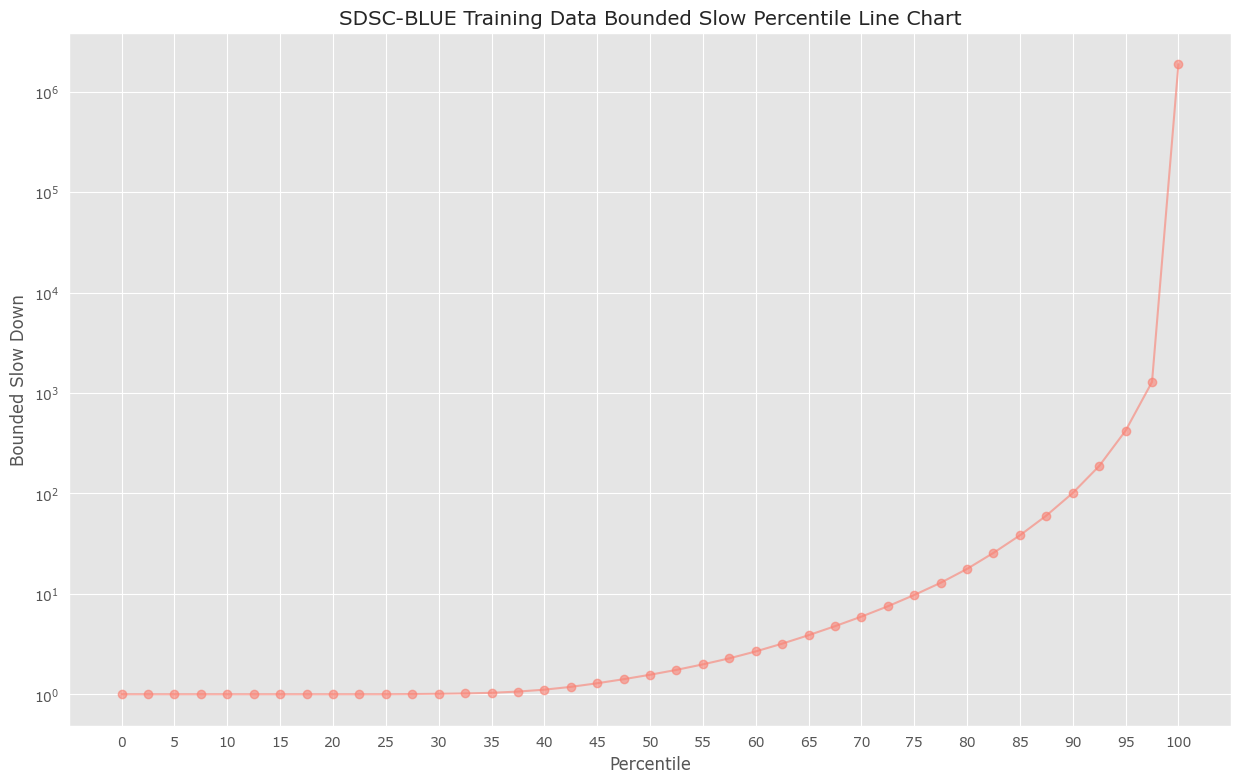

In [51]:
plot_percentile(blsd, title=title)

In [52]:
np.median(blsd), np.mean(blsd), len(blsd), max(runtime), max(wait_time), np.mean(wait_time), np.mean(blsd), np.median(blsd), np.percentile(blsd, 90)

(1.5625336141986375,
 323.80838396551945,
 243280,
 616793,
 18756233,
 32195.06575961855,
 323.80838396551945,
 1.5625336141986375,
 100.9004220779221)

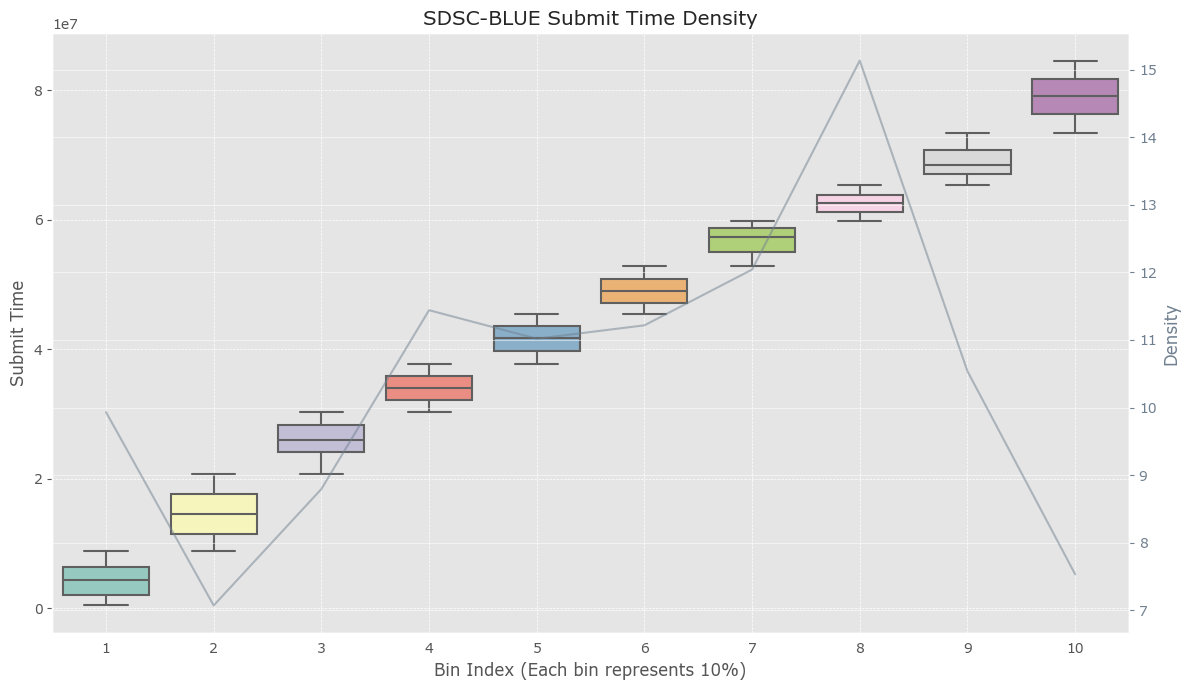

In [53]:
def plot_time_statistics_and_density(data, title):
    # Calculate bin edges for 5% quantiles
    bin_edges = np.percentile(data, [i for i in range(0, 101, 10)])

    # Digitize data into bin indices
    bins = np.digitize(data, bin_edges, right=True)

    # Remove data from the zero-th bin
    data = np.array(data)[bins != 0]
    bins = bins[bins != 0]

    bin_width = []
    for i in range(1, len(bin_edges)):
         bin_width.append(bin_edges[i] - bin_edges[i-1])

    density = [1/(i/sum(bin_width)) for i in bin_width]

    fig = plt.figure(figsize=(12, 7))

    ax1 = fig.subplots()

    # Overlay a boxplot for statistics
    sns.boxplot(x=bins, y=data, palette="Set3", ax=ax1)

        # Set title, labels, and legend
    ax1.set_title(title)
    ax1.set_xlabel('Bin Index (Each bin represents 10%)')
    ax1.set_ylabel('Submit Time')
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Create a twin axis for histogram
    ax2 = ax1.twinx()

    ax2.plot(np.arange(0, len(bin_edges) -1), density, color='slategrey', alpha=0.5)
    ax2.tick_params(axis='y', colors='slategrey', grid_alpha=0.5)
    ax2.yaxis.label.set_color('slategrey')
    ax2.set_ylabel('Density', color='slategrey')


    plt.tight_layout()
    plt.show()

plot_time_statistics_and_density(submit_time, f'{title} Submit Time Density')

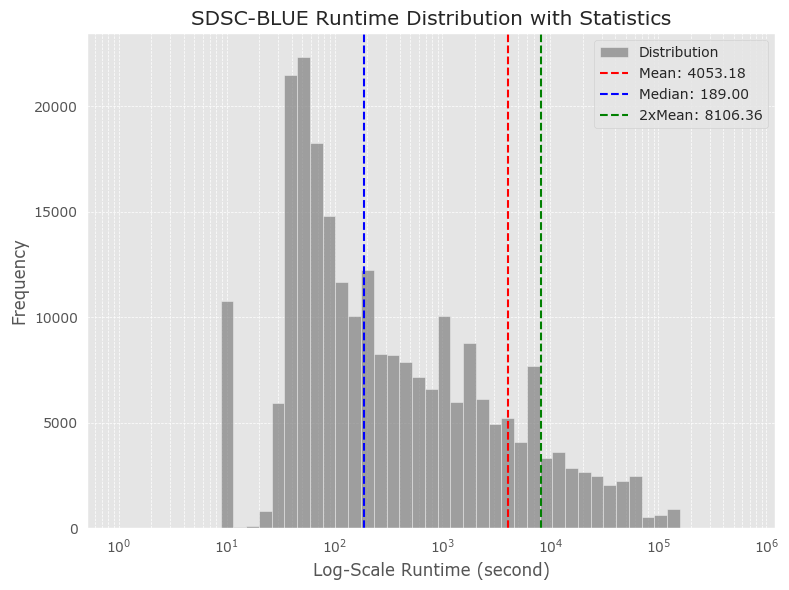

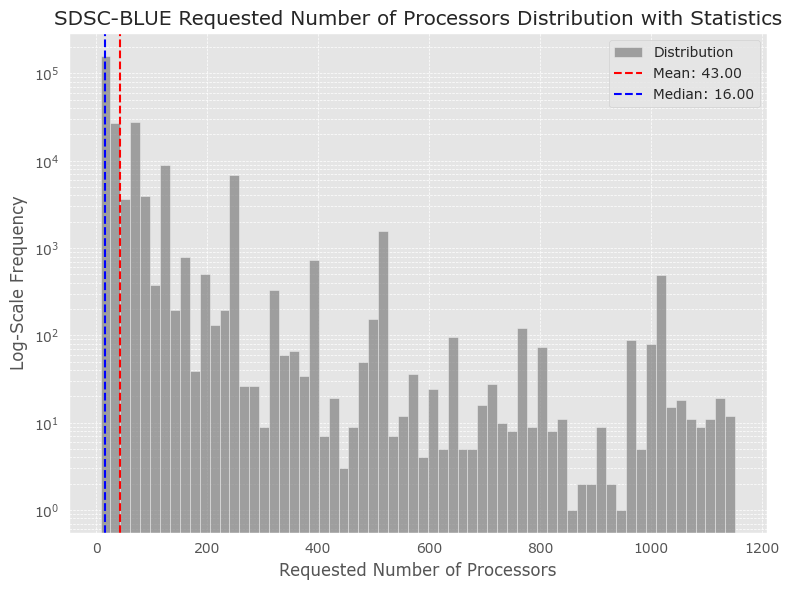

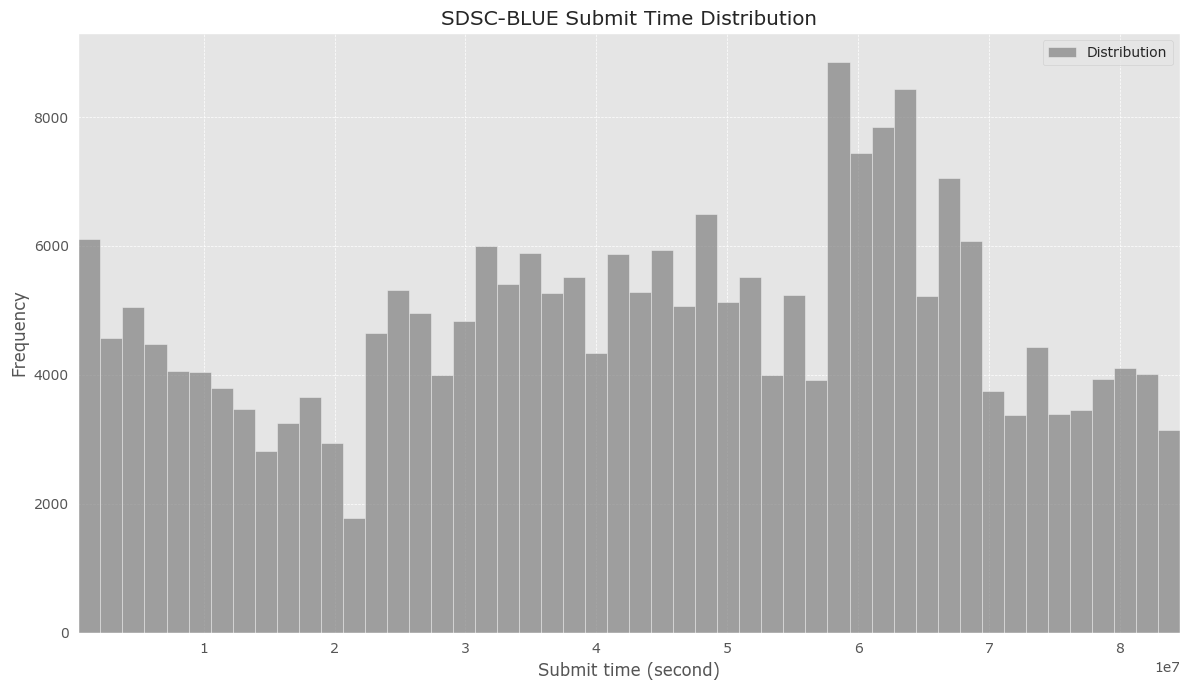

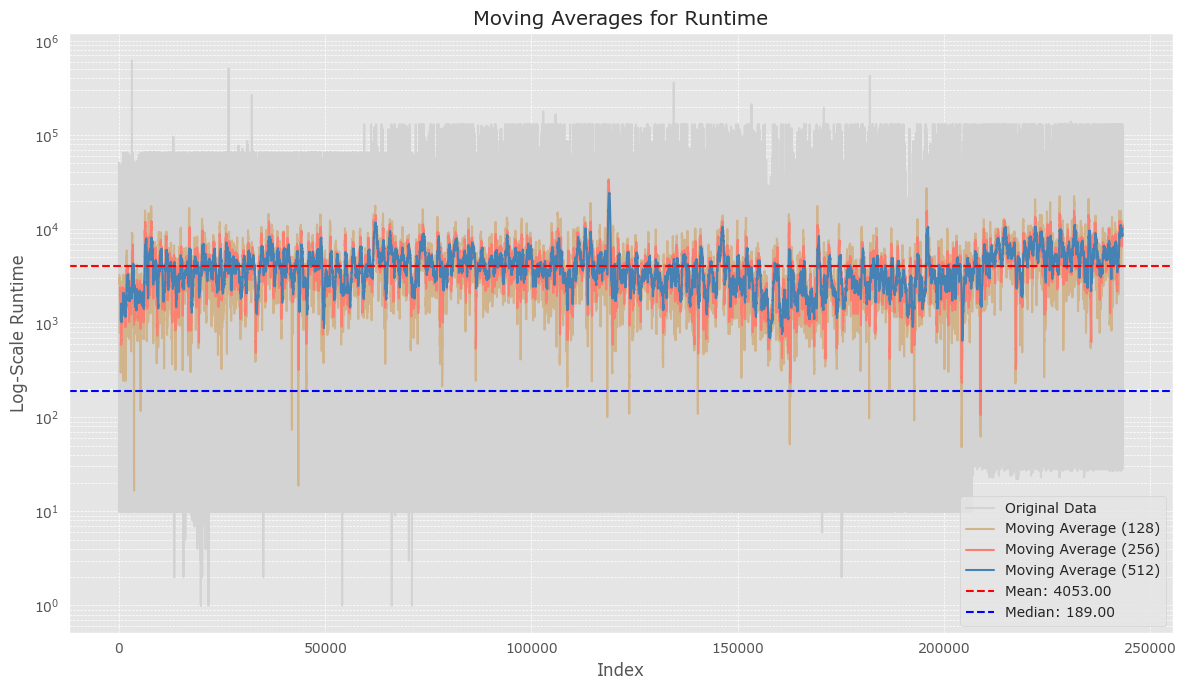

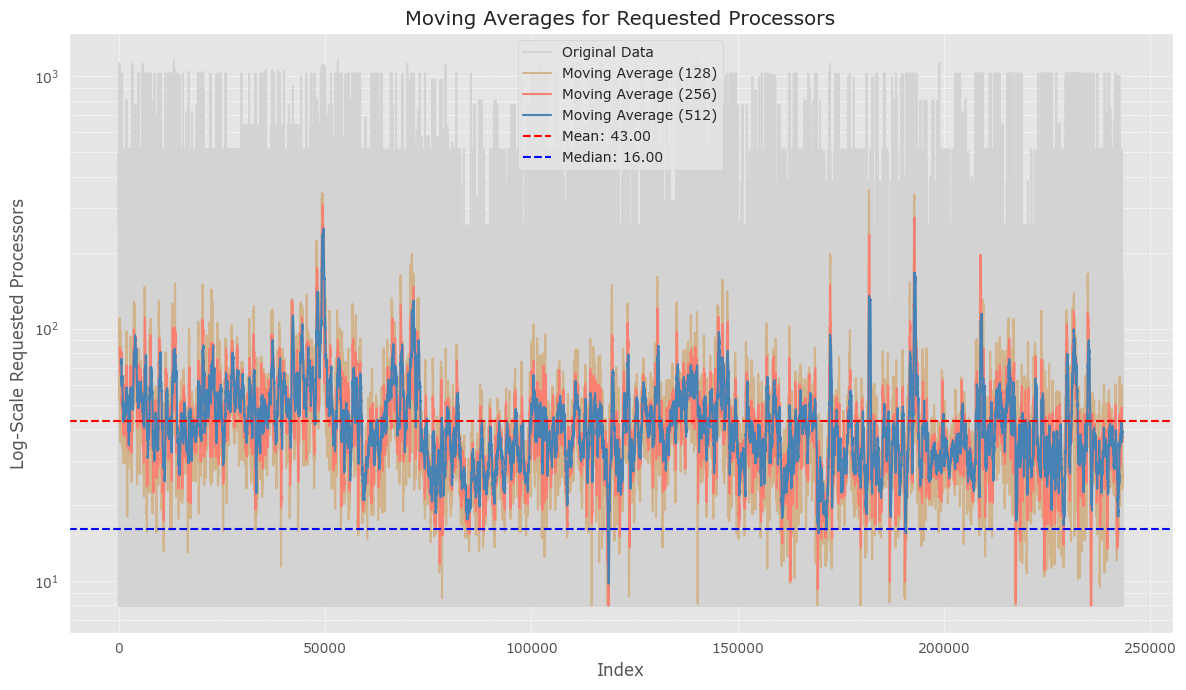

In [54]:
plot_runtime_distribution(runtime, title)
plot_n_procs_distribution(n_procs, title)
plot_submit_time_distribution(submit_time, title)
plot_moving_averages(runtime, d_type='Runtime')
plot_moving_averages(n_procs, d_type='Requested Processors')

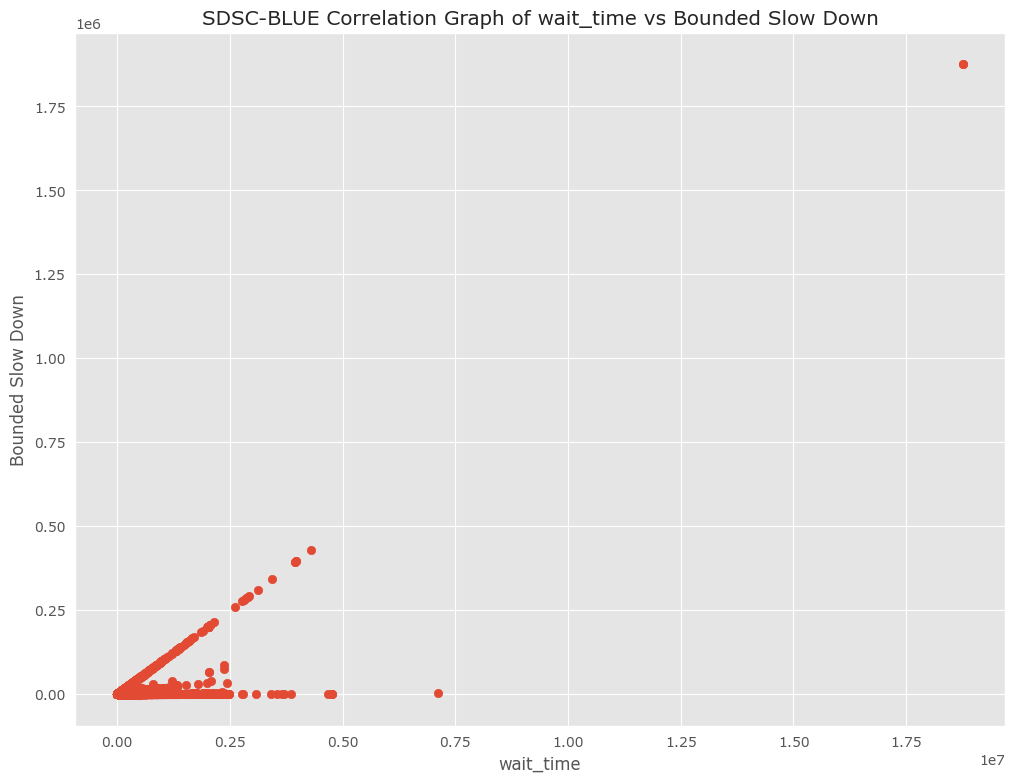

In [55]:
plt.figure(figsize=(12, 9))
plt.scatter(wait_time, blsd)
plt.title(f'{title} Correlation Graph of wait_time vs Bounded Slow Down')
plt.xlabel('wait_time')
plt.ylabel('Bounded Slow Down')
plt.show()

# Correlation Analysis

In [56]:
# Correlation coefficient
correlation_coefficient = np.corrcoef(wait_time, blsd)[0, 1]
correlation_coefficient

0.5525248652630702

In [57]:
index_remove = []
co_wait_time = []
co_bsld = []
co_proc = []
co_rt = []
bsld_median = np.mean(blsd)

percentile_values = np.arange(0, 100.25, 2.5)
percentiles = np.percentile(blsd, percentile_values)[-5:]

for i,j in enumerate(blsd):
    if j <= percentiles[0]:
        continue
    co_wait_time.append(wait_time[i])
    co_bsld.append(blsd[i])
    co_rt.append(runtime[i])
    co_proc.append(n_procs[i])

# Correlation coefficient
correlation_coefficient1 = np.corrcoef(co_wait_time, co_bsld)[0, 1]
correlation_coefficient2 = np.corrcoef(co_rt, co_bsld)[0, 1]
correlation_coefficient3 = np.corrcoef(co_proc, co_bsld)[0, 1]
correlation_coefficient1, correlation_coefficient2, correlation_coefficient3

(0.7430502107434843, -0.03716969936924658, 0.06978304084128122)

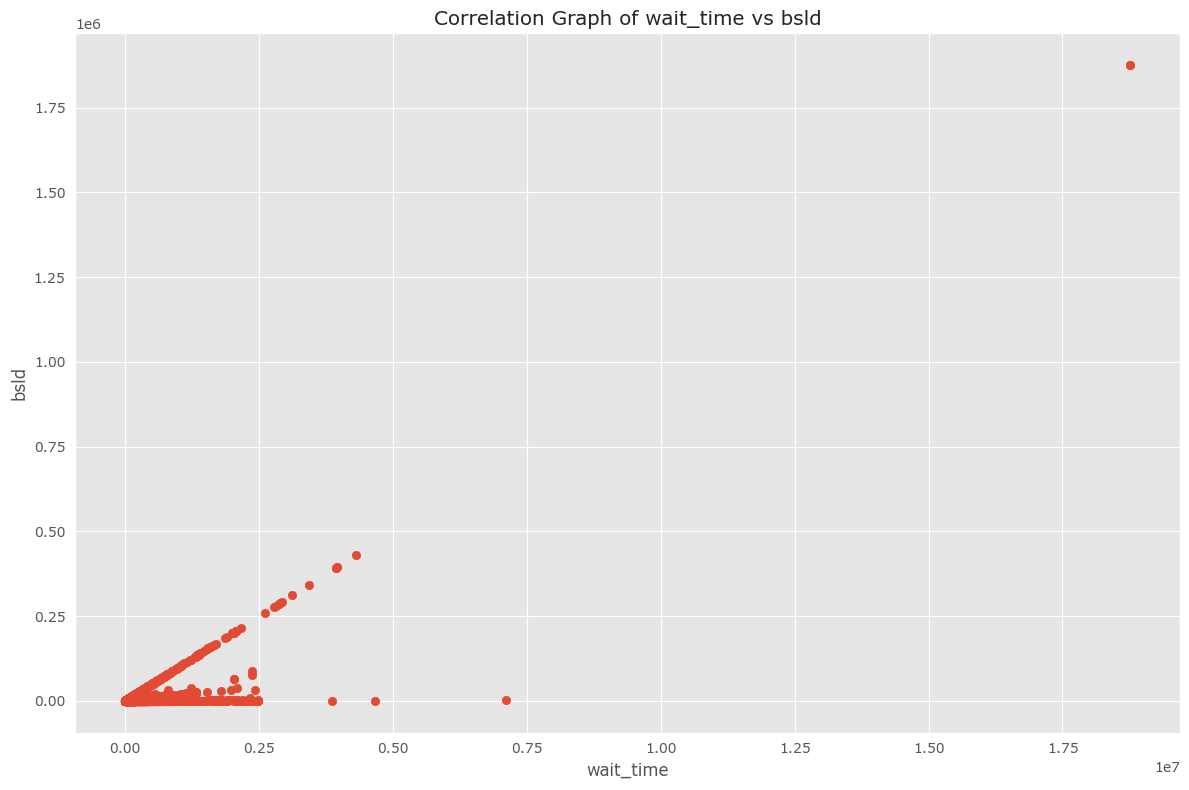

In [58]:
# Creating a figure and a set of subplots (2x1 grid)
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(co_wait_time, co_bsld)
plt.title('Correlation Graph of wait_time vs bsld')
plt.xlabel('wait_time')
plt.ylabel('bsld')

plt.tight_layout()
plt.show()